In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#
# PRT820: THE INFLUENCE OF POST-PUBLICATION CORRESPONDENCE ON RESEARCH PAPERS                #
# STUDENT: ANNE TA - S359453                                                                 #
# Code Objective: Apply various predictive models and find out the best model                # 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++#

In [1]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#-------------------------------------------------------------
# DEFINE BASIC FUNCTION FOR THE READING DATA FROM FILE
#-------------------------------------------------------------
import pandas as pd
#=======================================
# Define global variables for file path
#=======================================
def get_var(var_name):
    variable_filename = "variable/variable.txt"
    # Read the text file
    with open(variable_filename, 'r') as file:
        lines = file.readlines()

    # Initialize a dictionary to store the variables
    variables = {}

    # Process each line in the file
    for line in lines:
        # Split each line into variable name and value
        parts = line.strip().split(',')
        if len(parts) == 2:
            # Store the variable name and value in the dictionary
            variables[parts[0].strip()] = parts[1].strip()

    return variables[var_name]

#================================================================
# Define a function to read data from a CSV file into a DataFrame
#================================================================
def read_csv(filename, ec='ISO-8859-1'):
    try:
        # Load CSV data into DataFrame
        data_df = pd.read_csv(filename, encoding=ec)
        return data_df
    
    # Handle the case where the file is not found
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        
    # Handle any other exceptions that might occur during reading the CSV file
    except Exception as e:
        print("An error occurred:", e)

In [3]:
#----------------------------------------------------------------------
# STEP O.1: Read data and select the relevant data for the exploration
#----------------------------------------------------------------------
# Load the dataset
ppc_analysing_data_yearfilter_filepath =get_var('ppc_analysing_data_yearfilter_filepath')
pca_performance_filepath = get_var('pca_performance_filepath')

# Read data for analysing
ppc_data_df = read_csv(ppc_analysing_data_yearfilter_filepath)
ppc_data_df.columns
ppc_analysing_df = ppc_data_df[['Year','PPC_DOI', 'Article_Age_At_PPC',
       'Average_Citation_Before', 'Average_Citation_After', 'Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree', 'Influence']]

In [4]:
#----------------------------------------------------------------------
# STEP O.2: Define list of model will be executed
#----------------------------------------------------------------------
import matplotlib.pyplot as plt
# Initialize the models
models = {
    'Naive Bayes': BernoulliNB(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state=0)
}

In [5]:
#----------------------------------------------------------------------
# STEP O.2: Define scaler methods 
# comb_scaler: define scaler separately for each type of data
# scaler: define standard scaler for all features
#----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Separate the columns based on their type
topic_columns = ['Agree', 'Clarification', 'Question', 'Recommendation', 'Disagree']  # PPC topic confidence scores
age_column = ['Article_Age_At_PPC']  # Age of the article

# Apply StandardScaler to topic columns (since they are likely normally distributed)
# Apply RobustScaler (or MinMaxScaler) to the age column (since it is not normally distributed)
comb_scaler = ColumnTransformer([
    ('topic_scaler', StandardScaler(), topic_columns),
    ('age_scaler', RobustScaler(), age_column)  # or use MinMaxScaler()
])

# Apply StandardScaler for all features
scaler = StandardScaler()

In [6]:
#----------------------------------------------------------------------
# STEP O.3: Split data for training & test
#----------------------------------------------------------------------
# Exploratory data for modelling
model_df = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree','Influence']]

# Define variable for models
X = model_df.drop(columns=['Influence'])
y = model_df['Influence']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\caola\anaconda3\envs\prt820\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.911111   0.830123  0.911111  0.868734
1        Random Forest  0.900000   0.882353  0.900000  0.889360
2                  SVM  0.911111   0.830123  0.911111  0.868734
3  Logistic Regression  0.911111   0.830123  0.911111  0.868734
4        Decision Tree  0.888889   0.888889  0.888889  0.888889
5              XGBoost  0.888889   0.875661  0.888889  0.881622


C:\Users\caola\anaconda3\envs\prt820\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\caola\anaconda3\envs\prt820\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\caola\anaconda3\envs\prt820\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


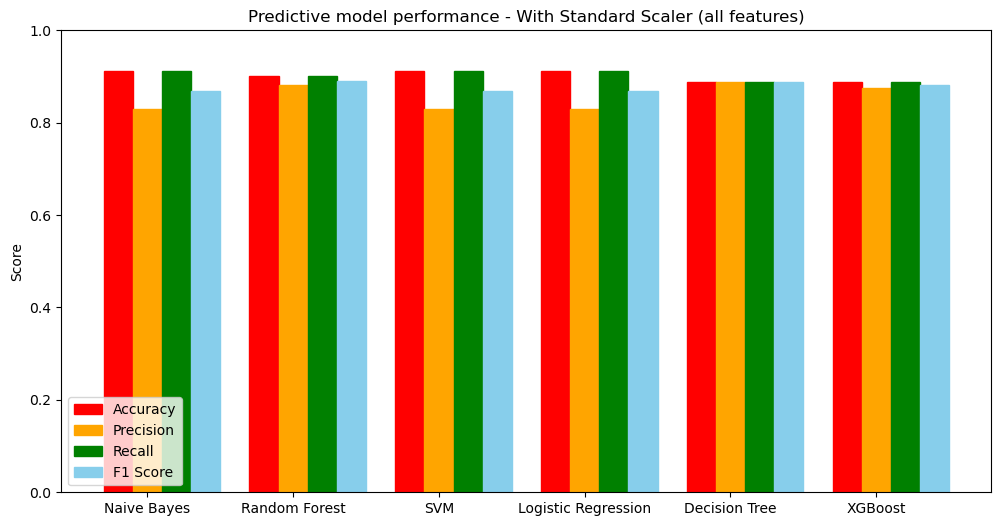

In [8]:
#----------------------------------------------------------------------
# STEP 1.2: Evaluate model performance with standard scaler
#----------------------------------------------------------------------
# Exploratory data for modelling
model_df = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree','Influence']]

# Define variable for models
X = model_df.drop(columns=['Influence'])
y = model_df['Influence']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_rscaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_rscaled = scaler.transform(X_test)  # Transform test data (use the same scaler)

# Performance model with scaler data and separate the scaler for Article Age
# Dictionary to store the results (accuracy, precision, recall, f1 score)
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}


# Loop through the models, train them, and calculate metrics
for name, model in models.items():
    model.fit(X_train_rscaled, y_train)  # Train the model
    y_pred = model.predict(X_test_rscaled)  # Make predictions on test set
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Convert the results to a DataFrame for easy plotting
results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv("model_evalutaion_scalerS.csv",index=False)

# Plot the accuracy, precision, recall, and F1-score for each model
plt.figure(figsize=(12, 6))

# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = np.arange(len(results_df['Model']))  # X-axis locations for first group
r2 = [x + bar_width for x in r1]  # X-axis locations for second group
r3 = [x + bar_width for x in r2]  # X-axis locations for third group
r4 = [x + bar_width for x in r3]  # X-axis locations for fourth group

# Plot the bars
plt.bar(r1, results_df['Accuracy'], color='red', width=bar_width, edgecolor='red', label='Accuracy')
plt.bar(r2, results_df['Precision'], color='orange', width=bar_width, edgecolor='orange', label='Precision')
plt.bar(r3, results_df['Recall'], color='green', width=bar_width, edgecolor='green', label='Recall')
plt.bar(r4, results_df['F1 Score'], color='skyblue', width=bar_width, edgecolor='skyblue', label='F1 Score')


# General formatting
# plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(results_df['Model']))], results_df['Model'])
plt.ylabel('Score')
plt.title('Predictive model performance - With Standard Scaler (all features)')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for metrics
plt.legend(loc='lower left')

   Accuracy  Precision    Recall  F1-Score
3  0.900000   0.882353  0.900000  0.889360
4  0.911111   0.901323  0.911111  0.905297
5  0.922222   0.910850  0.922222  0.913946


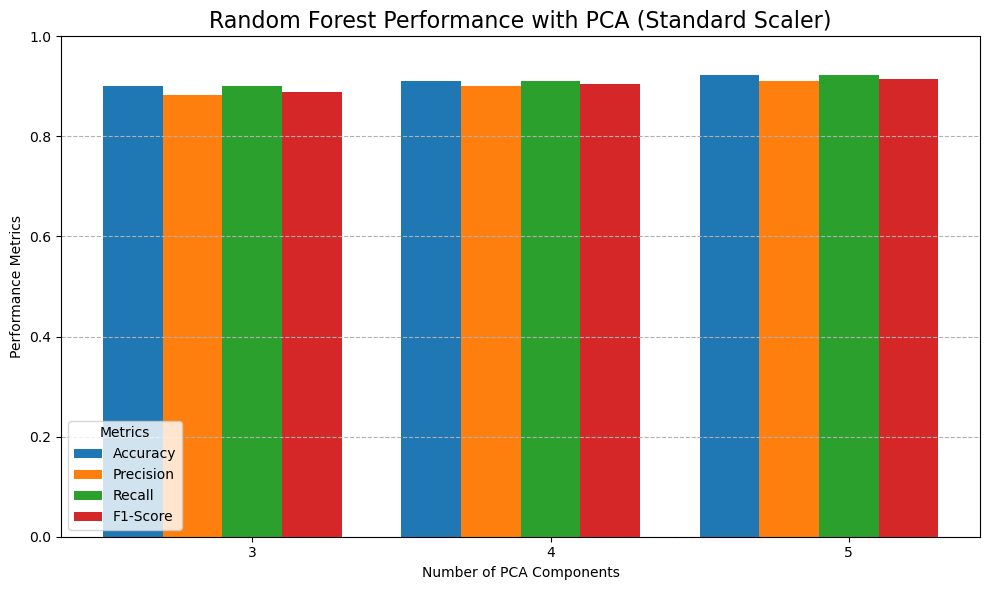

In [9]:
#----------------------------------------------------------------------
# STEP 2.2: Random Forest Performance with PCA (Standard Scaler)
#----------------------------------------------------------------------
# Exploratory data for modelling
model_df = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree','Influence']]

# Define variable for models
X = model_df.drop(columns=['Influence'])
y = model_df['Influence']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_rscaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_rscaled = scaler.transform(X_test)  # Transform test data (use the same scaler)


# Dictionary to store the performance metrics for each PCA dimension
results = {}

# Initialize the BernoulliNB model
model = RandomForestClassifier(random_state=0)

# Loop through different numbers of PCA components (3, 4, 5)
for n_components in range(3, 6):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_rscaled)
    X_test_pca = pca.transform(X_test_rscaled)  # Use transform here, not fit_transform

    # Train the BernoulliNB model
    model.fit(X_train_pca, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_pca)
    
    # Calculate all the required performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the performance metrics for this number of components
    results[n_components] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Convert the results dictionary to a DataFrame for easy viewing and plotting
results_df = pd.DataFrame(results).T  # Transpose to get PCA components as rows
print(results_df)

# Plot the performance metrics using a grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(10, 6))

# Set up bar positions
width = 0.2  # Width of each bar
x = range(len(results_df.index))  # X-axis positions for PCA components (3, 4, 5)

# Loop through each metric and plot the values for different PCA components
for i, metric in enumerate(metrics):
    plt.bar([p + width*i for p in x], results_df[metric], width=width, label=metric)

# Add titles and labels
plt.title('Random Forest Performance with PCA (Standard Scaler)', fontsize=16)
plt.xlabel('Number of PCA Components')
plt.ylabel('Performance Metrics')
plt.xticks([p + width*(len(metrics)/2) for p in x], results_df.index)  # Label x-axis with PCA components
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for performance metrics
plt.legend(title="Metrics", loc="lower left")

# Display the grid for better readability
plt.grid(True, axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

           FS_ANOVA    FS_MIS  FS_RandomForest
Accuracy   0.900000  0.911111         0.922222
Precision  0.882353  0.891990         0.907535
Recall     0.900000  0.911111         0.922222
F1 Score   0.889360  0.897354         0.905696


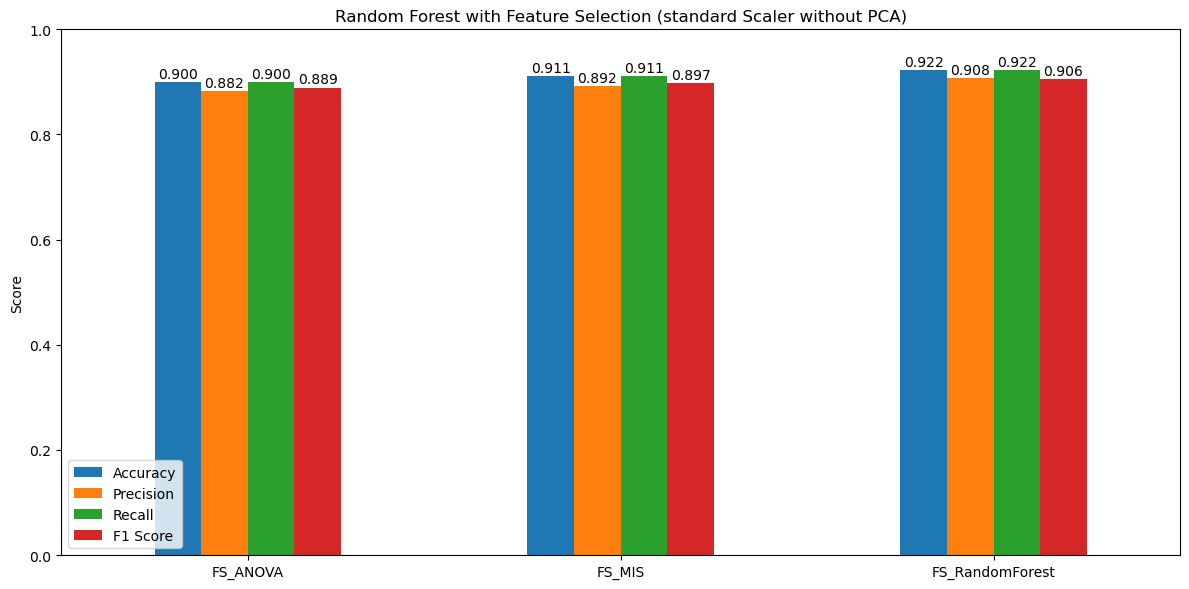

In [10]:
#-----------------------------------------------------------------------------------------------------------------------------
# STEP 6: Random Forest Performance model with Feature Selection: ANOVA, MIS, Random Forest Classifier (standard scaler without PCA)
#-----------------------------------------------------------------------------------------------------------------------------
# Exploratory data for modelling
model_df = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree','Influence']]

# Comparison Feature Selection Model Performance
nb_model = RandomForestClassifier(random_state=0)

# Replicate data for each data models
# ANOVA Dataset
anova_df = model_df.drop(columns = ['Question'], inplace=False)

# MIS Dataset
mis_df = model_df.drop(columns = ['Disagree'], inplace=False)
# Random Forest Classifier Dataset
rf_df = model_df.drop(columns = ['Article_Age_At_PPC'], inplace=False)


# Initialize a dictionary to store the metrics for each dataset
svm_metrics = {'FS_ANOVA': {}, 'FS_MIS': {}, 'FS_RandomForest': {}}


# Function to evaluate with cross-validation and collect metrics
def evaluate_before_cv(clf, X, y, dataset_name):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Scale the data using StandardScaler
    # scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
    X_test_scaled = scaler.transform(X_test)  # Transform test data (use the same scaler)

     
    # Define the correct scoring metrics for binary classification
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the mean of each metric (note the 'test_' prefix for cv_results)
    svm_metrics[dataset_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Create placeholders for your datasets (replace X1, y1, etc. with actual data)
datasets = {
    'FS_ANOVA': (anova_df.drop(columns='Influence'), anova_df['Influence']),  
    'FS_MIS': (mis_df.drop(columns='Influence'), mis_df['Influence']),  
    'FS_RandomForest': (rf_df.drop(columns='Influence'), rf_df['Influence'])
}


# Loop through the datasets and evaluate each one
for dataset_name, (X, y) in datasets.items():
    # Evaluate Naive Bayes before cross-validation
    evaluate_before_cv(nb_model, X, y, dataset_name)
    # evaluate_after_cv(nb_model, X, y, dataset_name)

# Convert the metrics dictionary to a DataFrame for easier plotting
svm_df = pd.DataFrame(svm_metrics)
print(svm_df)

# Transpose the DataFrame for better visualization (datasets as rows, metrics as columns)
svm_df = svm_df.T

# Plot the comparison of SVM performance across the four datasets
ax = svm_df.plot(kind='bar', figsize=(12, 6))

# Set chart properties
plt.title('Random Forest with Feature Selection (standard Scaler without PCA)')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 to represent the scores
plt.xticks(rotation=0)
plt.legend(loc='lower left')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Before Optimization - Accuracy: 0.9000, Precision: 0.8824, Recall: 0.9000, F1 Score: 0.8894
After Optimization - Accuracy: 0.9000, Precision: 0.8674, Recall: 0.9000, F1 Score: 0.8788


<Figure size 600x600 with 0 Axes>

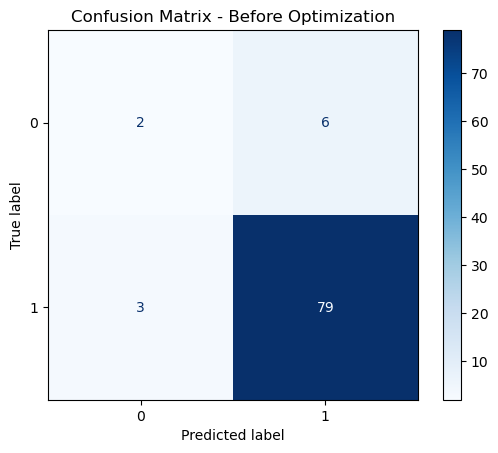

<Figure size 600x600 with 0 Axes>

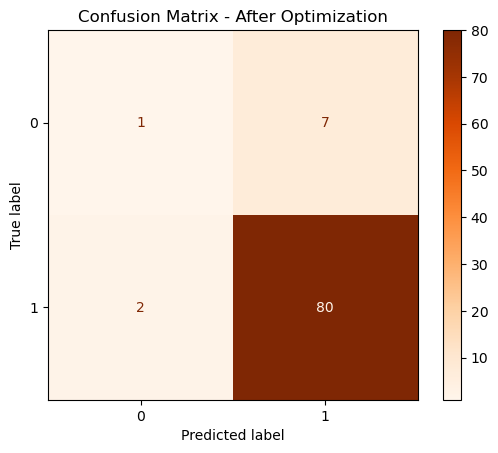

conf_matrix_before:  [[ 2  6]
 [ 3 79]]
conf_matrix_after:  [[ 1  7]
 [ 2 80]]


In [125]:
#-----------------------------------------------------------------------------------------------------------------------------
# STEP 6: Random Forest Performance with optimization (With standard scaler)
#-----------------------------------------------------------------------------------------------------------------------------
# Exploratory data for modelling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define the hyperparameter grid for Random Forest
# Exploratory data for modelling
model_df = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree','Influence']]

# Random Forest Classifier Dataset
rf_df = model_df.drop(columns = ['Article_Age_At_PPC'], inplace=False)

# Define variable for models
X = model_df.drop(columns=['Influence'])
y = model_df['Influence']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data (use the same scaler)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train_scaled, y_train)
y_pred_default = rf_model.predict(X_test_scaled)

# Apply Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_
print(f"Best hyperparameters for Random Forest: {grid_search.best_params_}")

# Predict on the test data using the optimized model
y_pred_optimized = best_rf_model.predict(X_test_scaled)

# Evaluate performance before optimization
default_accuracy = accuracy_score(y_test, y_pred_default)
default_precision = precision_score(y_test, y_pred_default, average='weighted')
default_recall = recall_score(y_test, y_pred_default, average='weighted')
default_f1 = f1_score(y_test, y_pred_default, average='weighted')
# Display the performance metrics after optimization
print(f"Before Optimization - Accuracy: {default_accuracy:.4f}, Precision: {default_precision:.4f}, Recall: {default_recall:.4f}, F1 Score: {default_f1:.4f}")


# Evaluate performance after optimization
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized, average='weighted')
optimized_recall = recall_score(y_test, y_pred_optimized, average='weighted')
optimized_f1 = f1_score(y_test, y_pred_optimized, average='weighted')

# Display the performance metrics after optimization
print(f"After Optimization - Accuracy: {optimized_accuracy:.4f}, Precision: {optimized_precision:.4f}, Recall: {optimized_recall:.4f}, F1 Score: {optimized_f1:.4f}")

# Confusion matrix for Random Forest before optimization
conf_matrix_before = confusion_matrix(y_test, y_pred_default)

# Plot the confusion matrix for before optimization
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(conf_matrix_before, display_labels=np.unique(y_test)).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Before Optimization")
plt.show()

# Confusion matrix for Random Forest after optimization
conf_matrix_after = confusion_matrix(y_test, y_pred_optimized)

# Plot the confusion matrix for after optimization
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(conf_matrix_after, display_labels=np.unique(y_test)).plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - After Optimization")
plt.show()

print("conf_matrix_before: ", conf_matrix_before)
print("conf_matrix_after: ", conf_matrix_after)
